In [1]:
import pandas as pd
import numpy as np
from skimage.color import grey2rgb
from skimage.transform import resize
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# def preprocess (images, dim=(224, 224)):
#     images = images.astype('float32')/255
    
#     new_images = np.empty((images.shape[0], dim[0], dim[1]))
#     for i in range(images.shape[0]):
#         if (i % 1000 == 0):
#             print 'image ' + str(i) + ' out of ' + str(images.shape[0])
#         new_images[i] = resize(images[i], dim)

#     del(images)
#     return grey2rgb(new_images)

In [3]:
# df = pd.read_csv('train.csv')

# X_train = df.drop('label', axis=1).values
# X_train = X_train.reshape(-1, 28, 28)
# Y_train = df['label'].values

# X_train_1 = preprocess(X_train[:21000])
# np.save('X_train_1.npy', X_train_1)
# del(X_train_1)

In [4]:
df = pd.read_csv('train.csv')

X_train = df.drop('label', axis=1).values
X_train = X_train.reshape(-1, 28, 28)
Y_train = df['label'].values

df = pd.read_csv('test.csv')
X_test = df.values
X_test = X_test.reshape(-1, 28, 28)

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
new_X_train = np.empty((X_train.shape[0], 48, 48))
print 'resizing training set images:'
for i in range(X_train.shape[0]):
    if (i % 1000 == 0):
        print 'image ' + str(i) + ' out of ' + str(X_train.shape[0])
    new_X_train[i] = resize(X_train[i], (48, 48))

X_train = new_X_train
del(new_X_train)
new_X_test = np.empty((X_test.shape[0], 48, 48))    
print 'resizing test set images:'
for i in range(X_test.shape[0]):
    if (i % 1000 == 0):
        print 'image ' + str(i) + ' out of ' + str(X_test.shape[0])
    new_X_test[i] = resize(X_test[i], (48, 48))
X_test = new_X_test
del(new_X_test)
X_train = grey2rgb(X_train)
X_test = grey2rgb(X_test)

resizing training set images:
image 0 out of 42000


/home/hboschirolli/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


image 1000 out of 42000
image 2000 out of 42000
image 3000 out of 42000
image 4000 out of 42000
image 5000 out of 42000
image 6000 out of 42000
image 7000 out of 42000
image 8000 out of 42000
image 9000 out of 42000
image 10000 out of 42000
image 11000 out of 42000
image 12000 out of 42000
image 13000 out of 42000
image 14000 out of 42000
image 15000 out of 42000
image 16000 out of 42000
image 17000 out of 42000
image 18000 out of 42000
image 19000 out of 42000
image 20000 out of 42000
image 21000 out of 42000
image 22000 out of 42000
image 23000 out of 42000
image 24000 out of 42000
image 25000 out of 42000
image 26000 out of 42000
image 27000 out of 42000
image 28000 out of 42000
image 29000 out of 42000
image 30000 out of 42000
image 31000 out of 42000
image 32000 out of 42000
image 33000 out of 42000
image 34000 out of 42000
image 35000 out of 42000
image 36000 out of 42000
image 37000 out of 42000
image 38000 out of 42000
image 39000 out of 42000
image 40000 out of 42000
image 410

In [7]:
print X_train.shape
print X_test.shape

(42000, 48, 48, 3)
(28000, 48, 48, 3)


In [8]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2)

Label: 9


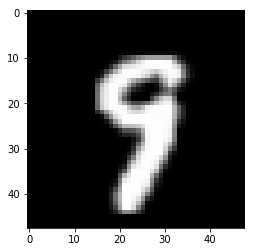

In [17]:
rng = randint(1, X_train.shape[0])
plt.imshow(X_train[rng], cmap='gray')
print "Label:", Y_train[rng]

Label: 9


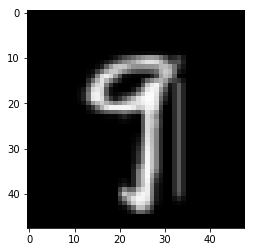

In [20]:
rng = randint(1, X_valid.shape[0])
plt.imshow(X_valid[rng], cmap='gray')
print "Label:", Y_valid[rng]

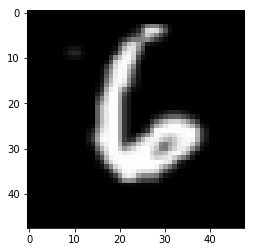

In [23]:
rng = randint(1, X_test.shape[0])
plt.imshow(X_test[rng], cmap='gray')

In [ ]:
np.save('X_train.npy', X_train)
np.save('Y_train.npy', Y_train)
np.save('X_valid.npy', X_valid)
np.save('Y_valid.npy', Y_valid)
np.save('X_test.npy', X_test)